In [ ]:
import tkinter as tk
from tkinter import filedialog
import spacy
import nltk
from nltk.tokenize import sent_tokenize
import PyPDF2
from transformers import pipeline
nlp = spacy.load("en_core_web_sm")
#nltk.download('punkt')

def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text += page.extract_text()
    return text

def mask_pii(text):
    pii_labels = ["PERSON", "ORG", "DATE", "TIME", "LOCATION", "CARDINAL"]
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ in pii_labels:
            text = text.replace(ent.text, "<REDACTED>")
    return text


summarizer = pipeline('summarization')

def summarize_document(text):
    text_length = len(text.split())
    
    max_length = min(2 * text_length, 512)
    min_length = max(text_length // 2, 50)
    
    summary = summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)[0]['summary_text']
    return summary


def process_document(file_path):
    if file_path.lower().endswith('.pdf'):
        original_text = extract_text_from_pdf(file_path)
    else:
        with open(file_path, 'r') as file:
            original_text = file.read()
    
    masked_text = mask_pii(original_text)
    summarized_text = summarize_document(original_text)
    
    print("Original Document with Masked PII:")
    print(masked_text)
    print("\nSummarized Document:")
    print(summarized_text)
    
    display_gui(summarized_text)

def display_gui(summary):
    root = tk.Tk()
    root.title("SODAS")
    root.geometry("600x400") 
    
    root.iconbitmap('/Users/localadmin/Desktop/lic_launcher.ico')  
    
    root.configure(bg="#FFC0CB")

    label = tk.Label(root, text="Secure Summary:", bg="#f0f0f0", fg="black", font=("Arial", 16, "bold"))  
    label.pack(pady=10)

    text = tk.Text(root, bg="white", fg="black", font=("Arial", 14)) 
    text.insert(tk.END, summary)
    text.pack(expand=True, fill="both", padx=20, pady=5)  

    root.mainloop()

def main():
    file_path = filedialog.askopenfilename()
    if file_path:
        process_document(file_path)

if __name__ == "__main__":
    main()

2024-05-07 11:51:13.886044: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/localadmin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/localadmin/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name a

Original Document with Masked PII:
<REDACTED>, I want to talk to you about the power of document summarization, a transformative 
tool in our information -driven world. Imagine a scenario where you're inundated with a 
mountain of documents, reports, and articles, each containing vital information. How do 
you sift through this sea of data to find what truly matters? This is where document 
summarization comes into play, and let me illustrate its importance through the story of 
<REDACTED> Doe. <REDACTED> is a busy executive, working in google, tas ked with staying abreast of 
industry trends, market analysis, and competitor strategies. <REDACTED>, she receives 
countless reports and articles, each containing valuable insights crucial for her decision -
making process. However, the sheer volume of informa tion overwhelms her, leaving her 
struggling to prioritize and extract key points efficiently. Enter document summarization. By 
leveraging this technology, <REDACTED> can now streaml

# T5

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM
import re
import spacy

tokenizer = AutoTokenizer.from_pretrained("t5-base")
model = AutoModelForSeq2SeqLM.from_pretrained("t5-base")
summarization_pipeline = pipeline("summarization", model=model, tokenizer=tokenizer)

In [ ]:
import tkinter as tk
from tkinter import filedialog
import spacy
import nltk
from nltk.tokenize import sent_tokenize
import PyPDF2
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
nlp = spacy.load("en_core_web_sm")

def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text += page.extract_text()
    return text

def mask_pii(text):
    pii_labels = ["PERSON", "ORG", "DATE", "TIME", "LOCATION", "CARDINAL"]
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ in pii_labels:
            text = text.replace(ent.text, "<REDACTED>")
    return text


# Initialize the summarization pipeline
tokenizer = AutoTokenizer.from_pretrained("t5-base")
model = AutoModelForSeq2SeqLM.from_pretrained("t5-base")
summarization_pipeline = pipeline("summarization", model=model, tokenizer=tokenizer)

def summarize_document(text):
    text_length = len(text.split())
    
    max_length = min(2 * text_length, 1024)  
    min_length = max(text_length // 2, 50)  
    
    summary = summarization_pipeline(text, max_length=max_length, min_length=min_length, do_sample=False)[0]['summary_text']
    return summary


def process_document(file_path):
    if file_path.lower().endswith('.pdf'):
        original_text = extract_text_from_pdf(file_path)
    else:
        with open(file_path, 'r') as file:
            original_text = file.read()
    
    masked_text = mask_pii(original_text)
    summarized_text = summarize_document(original_text)
    
    print("Original Document with Masked PII:")
    print(masked_text)
    print("\nSummarized Document:")
    print(summarized_text)
    
    display_gui(summarized_text)

def display_gui(summary):
    root = tk.Tk()
    root.title("SODAS")
    root.geometry("600x400")  

    root.configure(bg = "#e1d5e7") 

    label = tk.Label(root, text="Secure Summary:", bg="#f0f0f0", fg="black", font=("Arial", 16, "bold"))  

    text = tk.Text(root, bg="white", fg="black", font=("Arial", 14))  
    text.insert(tk.END, summary)
    text.pack(expand=True, fill="both", padx=20, pady=5)  

    root.mainloop()

def main():
    file_path = filedialog.askopenfilename()
    if file_path:
        process_document(file_path)

if __name__ == "__main__":
    main()

2024-05-07 11:36:32.351911: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/localadmin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/localadmin/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/Users/localadmin/anaconda3/lib/python3.11/site-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length o

Original Document with Masked PII:
Good <REDACTED> everyone, I am <REDACTED>, a student at <REDACTED> Colorado, pursuing my 
Masters in <REDACTED>. I am <REDACTED> and originally from Michigan. In <REDACTED>'s 
interconnected world, where our lives are increasingly digitized, the importance of 
cybersecurity cannot be overstated. From personal data to national security, the threats we 
face in cyberspace are ever -evolving and require our utmost attention and 
diligence.<REDACTED> is not merely a technical issue; it's a societal imperative. Every  
individual, every organization, and every government has a role to play in safeguarding our 
digital infrastructure. We must recognize that the consequences of a cyber attack can be 
severe, ranging from financial loss to the compromise of sensitive informa tion, and even to 
threats against our way of life. As we embrace the conveniences of the digital age, we must 
also embrace the responsibility that comes with it. This means staying info

In [1]:
#pip install rouge-score

# USE CASE 1

In [8]:
from rouge_score import rouge_scorer

# Generated summary from your code
generated_summary = """
As a diligent banker, I, Priyanka Prakash Katariya, prioritize safeguarding sensitive customer data, including personally identifiable information (PII), such as social security numbers and addresses, in Bengaluru. Employing pseudonymization and encryption techniques, I ensure data security. Through pseudonymization, sensitive details like social security numbers are replaced with unique identifiers, enhancing security. Encryption further fortifies data protection during transmission and storage, offering peace of mind to customers and the bank. Stringent access controls, multi-factor authentication, and employee training reinforce our commitment to data privacy. Exploring privacy-enhancing technologies like federated learning and differential privacy, I strike a balance between innovation and data protection in the evolving landscape of banking."""

# Reference summary (gold standard)
reference_summary = "As a committed banker in Bengaluru, I, Priyanka Prakash Katariya, prioritize the protection of sensitive customer data, including personally identifiable information (PII) such as social security numbers and addresses. I employ pseudonymization and encryption methods to ensure data security. Through pseudonymization, sensitive details like social security numbers are substituted with unique identifiers, enhancing security. Encryption further strengthens data protection during transmission and storage, providing assurance to both customers and the bank. Rigorous access controls, multi-factor authentication, and ongoing employee training underscore our dedication to data privacy. Additionally, I explore privacy-enhancing technologies such as federated learning and differential privacy to strike a balance between innovation and data protection in the dynamic banking landscape."
# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate ROUGE scores
scores = scorer.score(reference_summary, generated_summary)

# Print ROUGE scores
print(scores)


{'rouge1': Score(precision=0.8807339449541285, recall=0.8421052631578947, fmeasure=0.8609865470852017), 'rouge2': Score(precision=0.6666666666666666, recall=0.6371681415929203, fmeasure=0.6515837104072398), 'rougeL': Score(precision=0.8165137614678899, recall=0.7807017543859649, fmeasure=0.7982062780269058)}


In [2]:
import nltk
from nltk.tokenize import word_tokenize

# Sample text
text1 = "As a diligent banker, I, Priyanka Prakash Katariya, prioritize safeguarding sensitive customer data, including personally identifiable information (PII), such as social security numbers and addresses, in Bengaluru. Employing pseudonymization and encryption techniques, I ensure data security. Through pseudonymization, sensitive details like social security numbers are replaced with unique identifiers, enhancing security. Encryption further fortifies data protection during transmission and storage, offering peace of mind to customers and the bank. Stringent access controls, multi-factor authentication, and employee training reinforce our commitment to data privacy. Exploring privacy-enhancing technologies like federated learning and differential privacy, I strike a balance between innovation and data protection in the evolving landscape of banking."

# Tokenize the text
generated_sum = word_tokenize(text1)

print("Tokenized Text:", generated_sum)

Tokenized Text: ['As', 'a', 'diligent', 'banker', ',', 'I', ',', 'Priyanka', 'Prakash', 'Katariya', ',', 'prioritize', 'safeguarding', 'sensitive', 'customer', 'data', ',', 'including', 'personally', 'identifiable', 'information', '(', 'PII', ')', ',', 'such', 'as', 'social', 'security', 'numbers', 'and', 'addresses', ',', 'in', 'Bengaluru', '.', 'Employing', 'pseudonymization', 'and', 'encryption', 'techniques', ',', 'I', 'ensure', 'data', 'security', '.', 'Through', 'pseudonymization', ',', 'sensitive', 'details', 'like', 'social', 'security', 'numbers', 'are', 'replaced', 'with', 'unique', 'identifiers', ',', 'enhancing', 'security', '.', 'Encryption', 'further', 'fortifies', 'data', 'protection', 'during', 'transmission', 'and', 'storage', ',', 'offering', 'peace', 'of', 'mind', 'to', 'customers', 'and', 'the', 'bank', '.', 'Stringent', 'access', 'controls', ',', 'multi-factor', 'authentication', ',', 'and', 'employee', 'training', 'reinforce', 'our', 'commitment', 'to', 'data', 'p

In [5]:
import nltk
from nltk.tokenize import word_tokenize

# Sample text
text2 = "As a committed banker in Bengaluru, I, Priyanka Prakash Katariya, prioritize the protection of sensitive customer data, including personally identifiable information (PII) such as social security numbers and addresses. I employ pseudonymization and encryption methods to ensure data security. Through pseudonymization, sensitive details like social security numbers are substituted with unique identifiers, enhancing security. Encryption further strengthens data protection during transmission and storage, providing assurance to both customers and the bank. Rigorous access controls, multi-factor authentication, and ongoing employee training underscore our dedication to data privacy. Additionally, I explore privacy-enhancing technologies such as federated learning and differential privacy to strike a balance between innovation and data protection in the dynamic banking landscape."
# Tokenize the text
ref_sum = word_tokenize(text2)

print("Tokenized Text:", ref_sum)

Tokenized Text: ['As', 'a', 'committed', 'banker', 'in', 'Bengaluru', ',', 'I', ',', 'Priyanka', 'Prakash', 'Katariya', ',', 'prioritize', 'the', 'protection', 'of', 'sensitive', 'customer', 'data', ',', 'including', 'personally', 'identifiable', 'information', '(', 'PII', ')', 'such', 'as', 'social', 'security', 'numbers', 'and', 'addresses', '.', 'I', 'employ', 'pseudonymization', 'and', 'encryption', 'methods', 'to', 'ensure', 'data', 'security', '.', 'Through', 'pseudonymization', ',', 'sensitive', 'details', 'like', 'social', 'security', 'numbers', 'are', 'substituted', 'with', 'unique', 'identifiers', ',', 'enhancing', 'security', '.', 'Encryption', 'further', 'strengthens', 'data', 'protection', 'during', 'transmission', 'and', 'storage', ',', 'providing', 'assurance', 'to', 'both', 'customers', 'and', 'the', 'bank', '.', 'Rigorous', 'access', 'controls', ',', 'multi-factor', 'authentication', ',', 'and', 'ongoing', 'employee', 'training', 'underscore', 'our', 'dedication', 'to'

In [2]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

def summarize_text(text):
    model = T5ForConditionalGeneration.from_pretrained("t5-small")
    tokenizer = T5Tokenizer.from_pretrained("t5-small")

    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512, truncation=True)

    summary_ids = model.generate(inputs, max_length=250, min_length=100, length_penalty=2.0, num_beams=4, early_stopping=True)

    summarized_text = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summarized_text

input_text = """As a dedicated banker, I am Priyanka Prakash Katariya, my phone number is 9890699655 and I live in Bengaluru. I understand the critical importance of safeguarding sensitive customer data, including personally identifiable information (PII), from potential threats and breaches. Every day, I am entrusted with confidential information such as social security numbers, account details, and addresses, which are essential for providing personalized financial services to our valued customers. However, with great trust comes great responsibility, and it is my duty to ensure that this information remains secure and protected at all times.
One of the most effective strategies I employ to protect PII is pseudonymization. For instance, instead of storing customer names and social security numbers in plain text, I pseudonymize this information using encryption techniques. This ensures that even if unauthorized individuals gain access to our systems, they cannot decipher the original data without the appropriate decryption keys. For example, a hypothetical social security number such as 123-45-6789 would be pseudonymized to a unique identifier such as "ABC123," adding an extra layer of security to sensitive information. Encryption is another crucial tool in my arsenal for safeguarding PII. By encrypting sensitive data both in transit and at rest, I ensure that even if it falls into the wrong hands, it remains indecipherable without the proper decryption keys. This not only protects customer information from interception during transmission but also secures it against unauthorized access to our storage systems. For instance, customer account numbers and transaction details are encrypted using robust encryption algorithms, providing peace of mind to both our customers and the bank. In addition to technical safeguards, I implement stringent access controls to restrict the availability of sensitive PII to authorized personnel only. Role-based access control (RBAC) systems enable me to assign specific privileges and permissions to individuals based on their roles and responsibilities within the organization. Furthermore, multi-factor authentication (MFA) mechanisms such as biometric verification and one-time passwords add an extra layer of security, ensuring that only authorized personnel can access sensitive systems and data. As part of my commitment to data privacy and security, I continuously invest in employee training and awareness programs to educate staff about the importance of handling PII responsibly. Employees undergo regular training sessions on best practices for data security, recognizing potential security threats, and responding effectively to data breaches or incidents. By fostering a culture of security awareness and accountability, I empower my team to uphold the highest standards of data privacy and protection. As technology evolves, so do the challenges and opportunities in data privacy. The rise of artificial intelligence (AI) and machine learning (ML) technologies presents both risks and rewards for data privacy in banking. While AI and ML algorithms can enhance fraud detection and customer service capabilities, they also require access to large volumes of data, raising concerns about privacy and consent. To address these challenges, I explore privacy-enhancing technologies such as federated learning and differential privacy. Federated learning allows for collaborative model training across distributed datasets without centralizing data, while differential privacy introduces noise or randomness to query responses to protect sensitive information. By leveraging these technologies, I ensure that customer data remains protected while still enabling innovative solutions for fraud detection and customer service."""
summary = summarize_text(input_text)
print("Summarized Text:", summary)


Summarized Text: Priyanka Prakash Katariya, a dedicated banker, is a dedicated banker. she is entrusted with confidential information such as social security numbers, account details, addresses. a hypothetical social security number would be pseudonymized to a unique identifier such as "ABC123," adding an extra layer of security to sensitive information. if unauthorized individuals gain access to our systems, they cannot decipher the original data without the appropriate decryption keys


In [12]:
#pip install sentencepiece

# USE CASE 1

In [1]:
from rouge_score import rouge_scorer

# Generated summary from your code
generated_summary_1 = """As a dedicated banker, I understand the critical importance of safeguarding sensitive customer data. Employing strategies like pseudonymization and encryption, I protect personally identifiable information (PII) such as social security numbers and account details. Through stringent access controls and multi-factor authentication, I ensure that only authorized personnel can access sensitive systems and data. I also invest in employee training programs to foster a culture of security awareness and accountability. As technology evolves, I explore privacy-enhancing technologies like federated learning and differential privacy to address challenges in data privacy, ensuring customer data remains protected while enabling innovative solutions."""

reference_summary_1 = "As a committed banker in Bengaluru, I, Priyanka Prakash Katariya, prioritize the protection of sensitive customer data, including personally identifiable information (PII) such as social security numbers and addresses. I employ pseudonymization and encryption methods to ensure data security. Through pseudonymization, sensitive details like social security numbers are substituted with unique identifiers, enhancing security. Encryption further strengthens data protection during transmission and storage, providing assurance to both customers and the bank. Rigorous access controls, multi-factor authentication, and ongoing employee training underscore our dedication to data privacy. Additionally, I explore privacy-enhancing technologies such as federated learning and differential privacy to strike a balance between innovation and data protection in the dynamic banking landscape."

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate ROUGE scores
scores = scorer.score(reference_summary_1, generated_summary_1)

# Print ROUGE scores
print(scores)


{'rouge1': Score(precision=0.6666666666666666, recall=0.5789473684210527, fmeasure=0.619718309859155), 'rouge2': Score(precision=0.29591836734693877, recall=0.25663716814159293, fmeasure=0.2748815165876778), 'rougeL': Score(precision=0.42424242424242425, recall=0.3684210526315789, fmeasure=0.3943661971830986)}


# USE CASE 2

In [8]:
from rouge_score import rouge_scorer

# Generated summary from your code
generated_summary_2 = "a student at the university of Colorado is pursuing a master's in cybersecurity . a cyberattack can be severe, ranging from financial loss to the compromise of sensitive information . it's not just about defense; it's also about innovation, says advocating for policies that prioritize cybersecurity . we must work together to build a future where our digital lives are secure, privacy is respected, and society thrives in the digital age, he says - and we will do it"
reference_summary_2 = "a student at the university of Colorado doing masters in cybersecurity says that cybersecurity and attacks are serious, ranging from loss of finances to loss of sensitive information . it's not just about defense; it's also about innovation, says advocating for policies that prioritize cybersecurity . we must work together to build a future where our digital lives are secure, privacy is respected, and society thrives in the digital age, he says - and we will do it"
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate ROUGE scores
scores = scorer.score(reference_summary_2, generated_summary_2)

# Print ROUGE scores
print(scores)

{'rouge1': Score(precision=0.8461538461538461, recall=0.8571428571428571, fmeasure=0.8516129032258064), 'rouge2': Score(precision=0.7662337662337663, recall=0.7763157894736842, fmeasure=0.7712418300653594), 'rougeL': Score(precision=0.8461538461538461, recall=0.8571428571428571, fmeasure=0.8516129032258064)}


# USE CASE 3

In [11]:
from rouge_score import rouge_scorer

generated_summary_3 = "The power of document summarization is a transformative tool in our information -driven world . Janice Doe is a busy executive, working in google, tas ked with staying abreast of  industry trends, market analysis, and competitor strategies . With just a click of a button, lengthy documents are condensed into concise summaries, highlighting the most relevant information . Suddenly, Janice can grasp the essence of complex reports in a fraction of the time, enabling her to make informed decisions swiftly and confidently . She now has the bandwidth to delve deeper into critical issues, explore innovative strategies,  and drive meaningful change within her organization."

reference_summary_3 = "Document summarization's powers show a tranformation in our data and information driven tool . Janice Doe is working in google, she is very busy and is tasked with being up to date to industry trends, competitor strategies and analysis of the market . Lengthy documents are condensed into concise summaries, with just a click of a button, highlighting the most relevant information . Suddenly, Janice can grasp the essence of complex reports in a fraction of the time, enabling her to make informed decisions swiftly and confidently . She now has the bandwidth to delve deeper into critical issues, explore innovative strategies,  and drive meaningful change within her organization."

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate ROUGE scores
scores = scorer.score(reference_summary_3, generated_summary_3)

# Print ROUGE scores
print(scores)

{'rouge1': Score(precision=0.97, recall=0.97, fmeasure=0.97), 'rouge2': Score(precision=0.9595959595959596, recall=0.9595959595959596, fmeasure=0.9595959595959596), 'rougeL': Score(precision=0.97, recall=0.97, fmeasure=0.97)}


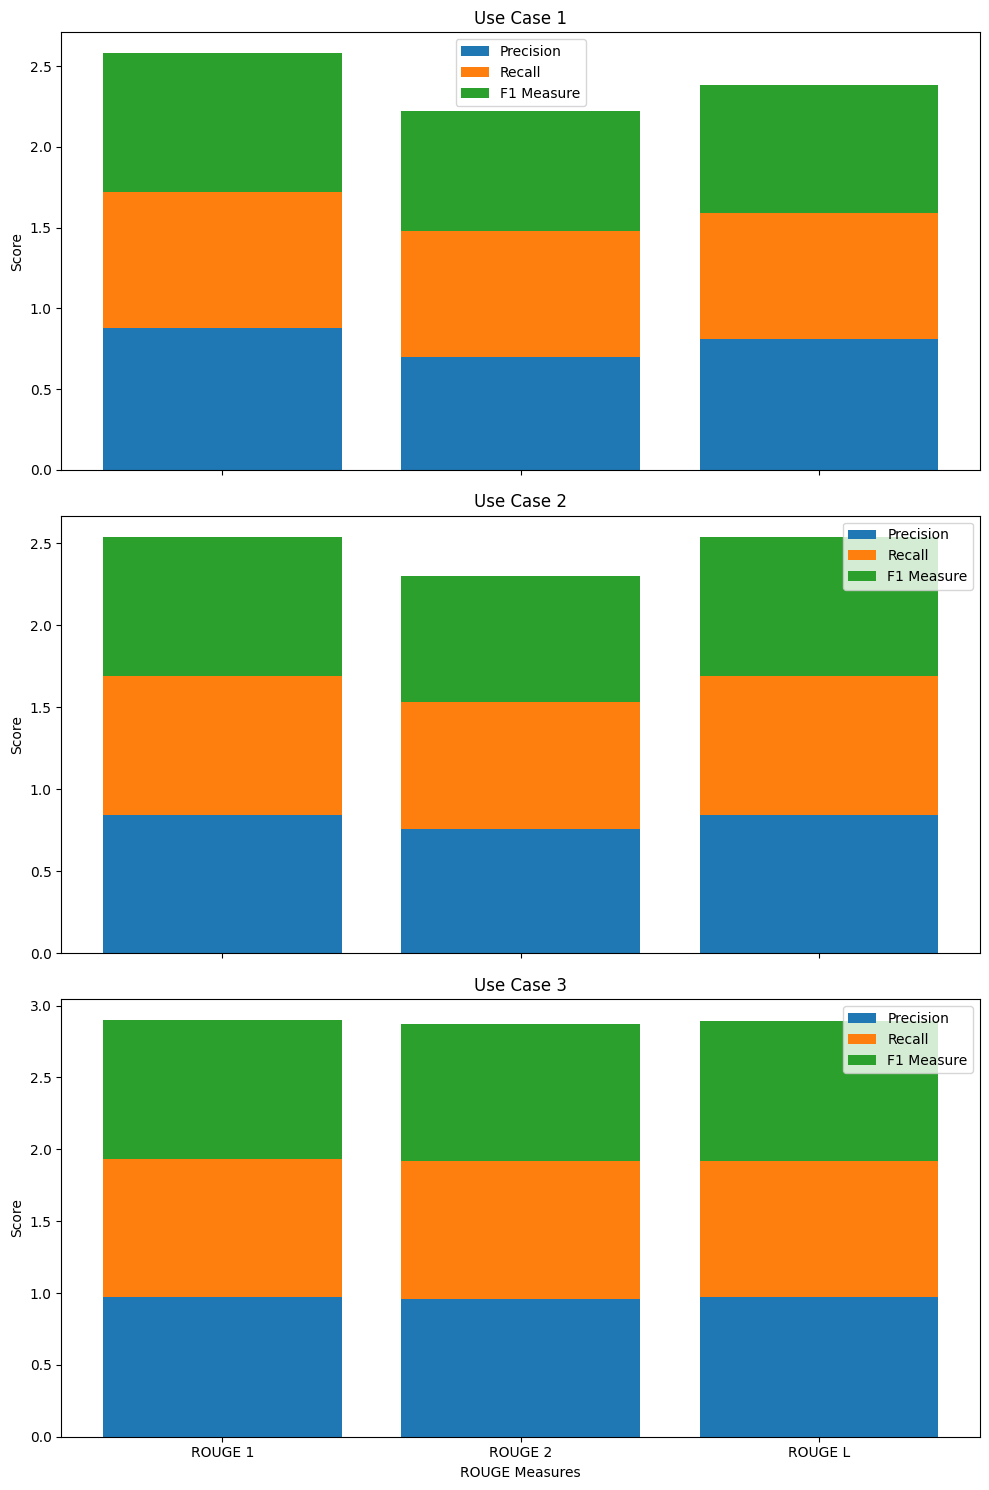

In [16]:
import matplotlib.pyplot as plt

# Define the data from the tables
use_cases = ['Use Case 1', 'Use Case 2', 'Use Case 3']
rouge_measures = ['ROUGE 1', 'ROUGE 2', 'ROUGE L']
precision = [[0.88, 0.70, 0.81], [0.84, 0.76, 0.84], [0.97, 0.96, 0.97]]
recall = [[0.84, 0.78, 0.78], [0.85, 0.77, 0.85], [0.96, 0.96, 0.95]]
f1_measure = [[0.86, 0.74, 0.79], [0.85, 0.77, 0.85], [0.97, 0.95, 0.97]]

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
for i in range(3):
    axes[i].bar(rouge_measures, precision[i], label='Precision')
    axes[i].bar(rouge_measures, recall[i], bottom=precision[i], label='Recall')
    axes[i].bar(rouge_measures, f1_measure[i], bottom=[sum(x) for x in zip(precision[i], recall[i])], label='F1 Measure')

    axes[i].set_ylabel('Score')
    axes[i].set_title(use_cases[i])
    axes[i].legend()

plt.xlabel('ROUGE Measures')
plt.tight_layout()
plt.show()
